In [1]:
# Imports:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Load data:
if 1:
    #df1 = pd.read_csv("Data/Datasets/Case1/Proj_NWP_Case1.csv")
    #df2 = pd.read_csv("Data/Datasets/Case1/Proj_Measurements_Case1.csv")

    #df1 = pd.read_csv("Case1/Proj_NWP_Case1.csv")
    #df2 = pd.read_csv("Case1/Proj_Measurements_Case1.csv")

    df1 = pd.read_csv("Proj_NWP_Case1.csv")
    df2 = pd.read_csv("Proj_Measurements_Case1.csv")

    # Attributes:
    dir_id = np.arange(len(df1.columns))[df1.columns.str.contains("Direction")]
    speed_id = np.arange(len(df1.columns))[df1.columns.str.contains("Speed")]
    temp_id = np.arange(len(df1.columns))[df1.columns.str.contains("Temperature")]
    dens_id = np.arange(len(df1.columns))[df1.columns.str.contains("Density")]
    other_id = np.asarray(list(
        set([x for x in range(len(df1.columns))]).difference(
            set(np.r_[dir_id, speed_id, temp_id, dens_id]))))  # Dirty Hack

    # Targets:
    targets = df2['Park Power [KW]']


In [2]:
# Summary Statistics
if 1:
    sum_stats = pd.concat([df1.iloc[:, 1:].min(axis=0),
                           df1.iloc[:, 1:].quantile(q=0.25, axis=0),
                           df1.iloc[:, 1:].median(axis=0),
                           df1.iloc[:, 1:].mean(axis=0),
                           df1.iloc[:, 1:].quantile(q=0.75, axis=0),
                           df1.iloc[:, 1:].max(axis=0)], axis=1)

    sum_stats.columns=['Min', 'Q1', "Median", "Mean", "Q3", "Max"]

    PP = np.array([targets.min(), targets.quantile(q=0.25),
                   targets.median(), targets.mean(),
                   targets.quantile(q=0.75), targets.max()])

    PP = pd.DataFrame(PP, columns=["Park Power [KW]"], 
                      index=["Min", "Q1", "Median", "Mean", "Q3", "Max"]).T

    sum_stats = pd.concat([sum_stats, PP], axis=0)
    sum_stats

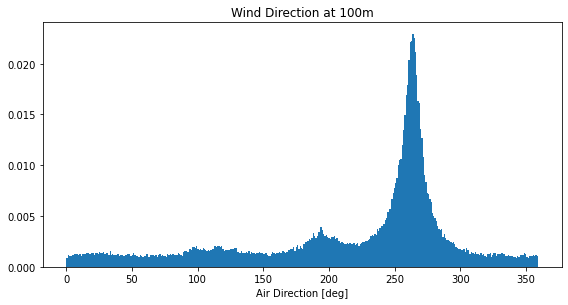

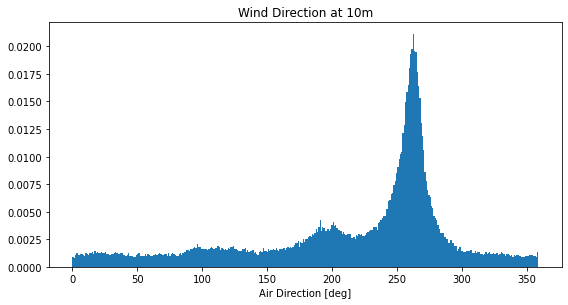

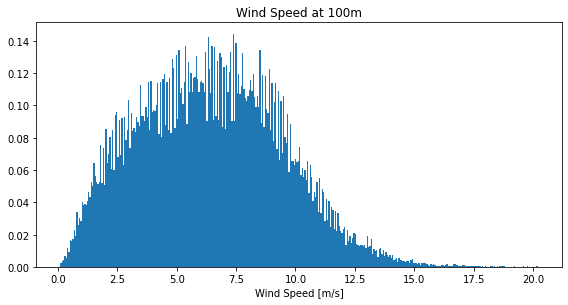

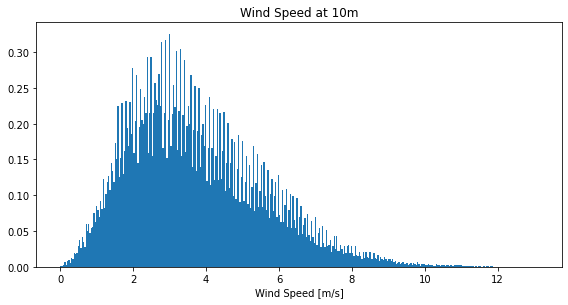

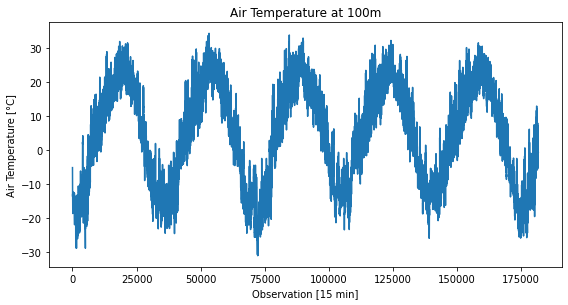

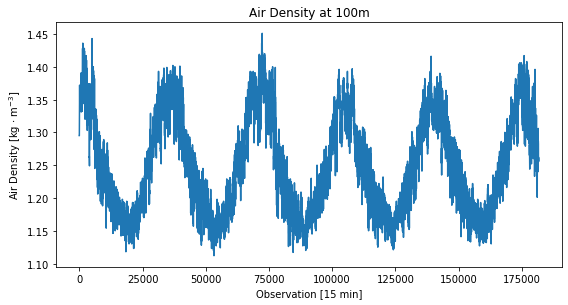

In [3]:
# Plot data:
if 1:
    
    # Air Directions:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[dir_id[2]]
    ax.hist(df1[col_name], bins=360, density=True)
    # ax.plot(df1[col_name], alpha=0.1)
    ax.title.set_text("Wind Direction at 100m")
    ax.set_xlabel("Air Direction [deg]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[dir_id[0]]
    ax.hist(df1[col_name], bins=360, density=True)
    # ax.plot(df1[col_name], alpha=0.1)
    ax.title.set_text("Wind Direction at 10m")
    ax.set_xlabel("Air Direction [deg]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
    
    # Air Speeds:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[speed_id[2]]
    ax.hist(df1[col_name], bins=360, density=True)
    # ax.plot(df1[col_name], alpha=0.1)
    ax.title.set_text("Wind Speed at 100m")
    ax.set_xlabel("Wind Speed [m/s]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[speed_id[0]]
    ax.hist(df1[col_name], bins=360, density=True)
    # ax.plot(df1[col_name], alpha=0.1)
    ax.title.set_text("Wind Speed at 10m")
    ax.set_xlabel("Wind Speed [m/s]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
    
    # Air Temperatures
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[temp_id[2]]
    # ax.hist(df1[col_name], bins=360, density=True)
    ax.plot(df1[col_name], alpha=1)
    ax.title.set_text("Air Temperature at 100m")
    ax.set_ylabel("Air Temperature [°C]")
    ax.set_xlabel("Observation [15 min]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
    
    # Air Densities
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    col_name = df1.columns[dens_id[2]]
    # ax.hist(df1[col_name], bins=360, density=True)
    ax.plot(df1[col_name], alpha=1)
    ax.title.set_text("Air Density at 100m")
    ax.set_ylabel(r"Air Density [kg $\cdot$ m$^{-3}$]")
    ax.set_xlabel("Observation [15 min]")
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
    
    
##### Extras:
    if 0:
    
        # Air Directions:
        fig = plt.figure(figsize=(8, 5))
        for i in range(4):
            ax = fig.add_subplot(2, 2, i + 1)
            col_name = df1.columns[dir_id[i]]
            ax.hist(df1[col_name], bins=360, density=True)
            # ax.plot(df1[col_name])
            ax.title.set_text(col_name)
            ax.set_xlabel("Air Direction [deg]")

        fig.suptitle("Air Directions at [10, 50, 100, 150] \n meters in front of wind turbine\n")

        fig.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

        # Air Speeds:
        fig = plt.figure(figsize=(8, 5))
        for i in range(4):
            ax = fig.add_subplot(2, 2, i + 1)
            col_name = df1.columns[speed_id[i]]
            # ax.hist(df1[col_name], bins=[x for x in range(int(np.ceil(np.max(np.max(df1[df1.columns[speed_id]])))))],
            #        density=True)
            ax.plot(df1[col_name])
            ax.title.set_text(col_name)
            ax.set_xlabel("Air Speed [m/s]")

        fig.suptitle("Air Speeds at [10, 50, 100, 150] \n meters in front of wind turbine\n")

        fig.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()


        # Air Temperatures:
        fig = plt.figure(figsize=(8, 5))
        for i in range(4):
            ax = fig.add_subplot(2, 2, i + 1)
            col_name = df1.columns[temp_id[i]]
            # ax.hist(df1[col_name], bins=360, density=True)
            ax.plot(df1[col_name])
            ax.title.set_text(col_name)
            ax.set_xlabel("Temperatures [C]")

        fig.suptitle("Air Temperatures at [10, 50, 100, 150] \n meters in front of wind turbine\n")

        fig.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

        
        # Air Densities:
        fig = plt.figure(figsize=(8, 5))
        for i in range(4):
            ax = fig.add_subplot(2, 2, i + 1)
            col_name = df1.columns[dens_id[i]]
            # ax.hist(df1[col_name], bins=360, density=True)
            ax.plot(df1[col_name])
            ax.title.set_text(col_name)
            ax.set_xlabel("Air Densities")

        fig.suptitle("Air Densities at [10, 50, 100, 150] \n meters in front of wind turbine\n")

        fig.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()    

In [4]:
# Preprocess data: (Removing erroneous rows and normalize/standardize data)
if 1:
    
    # Multiplier for Maximum Difference:
    multiplier = 0.3
    
    # Renaming
    y = targets
    X = df1.copy().iloc[:len(y), 1:]

    # Remember what rows contain bad data:
    rows_to_remove = np.zeros((len(y)), dtype=int)

    # 1. Remove rows with negative power output:
    rows_to_remove += (y < 0) * 1

    # 2. Remove rows with NaN power output:
    rows_to_remove += y.isnull() * 1

    # 3. Remove rows with high power output but low wind speed:
    rows_to_remove += ((((X[X.columns[speed_id - 1]] < 3).prod(axis=1)).astype(bool) * y) > 33 * 12)

    # 4. Remove rows with power output deviating by more than 30% from the theoretical value:
    speeds = np.arange(24)
    powers = np.array([0, 0, 0, 12.3, 36.9, 122.2, 233.0, 389.1, 597.1, 861.8, 1166.0, 1495.4, 1500.2, 1500.2, 1500.2,
                       1500.2, 1500.2, 1500.2, 1500.2, 1500.2, 1500.2, 1500.2, 1500.2, 1500.2])
    rows_to_remove += (np.abs(y - np.polyval(np.polyfit(speeds, powers * 33, deg=16),
                                             X.iloc[:, [1, 6, 10, 14]].median(axis=1))) > 49500 * multiplier)

    # 5. Check if the power output does not change:
    list1 = [y[i:(-10 + i)] for i in range(10)]
    rows_to_remove += np.r_[(np.array(list1).std(axis=0) == 0), np.zeros(10, dtype=bool)]

    # Convert:
    rows_to_keep = rows_to_remove == 0

    # Allocate dataframe:
    df3 = df1.copy().iloc[:len(y)]

    # One-hot encode each month
    one_hot_array = np.zeros((len(df3['Date_Time']), 12))
    for i in range(len(df3['Date_Time'])):
        YYYY, mm, w, dd, HH, MM, SS = (datetime.datetime.strptime(df3['Date_Time'][i], "%Y-%m-%d %H:%M:%S").strftime(
            "%Y, %m, %w, %d, %H, %M, %S")).split(",")
        one_hot_array[i, [int(mm) - 1]] = 1

    # Group attributes
    df3 = df3.reindex(columns=list(df1.columns[np.r_[other_id, dir_id, speed_id, temp_id, dens_id]].values))

    # Remove timestamps
    df3_norm = df3.iloc[:, 1:]

    # Append ids:
    df3_norm["ID"] = pd.Series(df3_norm.index.values, index=df3_norm.index)

    # Append months:
    index_list = [f"Month {x + 1}" for x in range(12)]
    for i in range(len(index_list)):
        df3_norm[index_list[i]] = pd.Series(one_hot_array[:, i], index=df3_norm.index)

    # Remove all bad rows:
    df3_norm = df3_norm[rows_to_keep]

    # Normalizations:
    df3_norm.iloc[:, 0] = (df3_norm.iloc[:, 0] - df3_norm.iloc[:, 0].mean()) / df3_norm.iloc[:, 0].std()

    df3_norm.iloc[:, 1:5] = df3_norm.iloc[:, 1:5] / 180 * np.pi - np.pi

    mu = df3_norm.iloc[:, 5:17].mean(axis=0)
    std = df3_norm.iloc[:, 5:17].std(axis=0)

    df3_norm.iloc[:, 5:17] = (df3_norm.iloc[:, 5:17] - mu) / std

    # Normalize ID's to be between 0 and 1:
    df3_norm['ID'] = df3_norm['ID'] / df3_norm['ID'].max()

    # Remove bad rows:
    y = y[rows_to_keep]

    # Set a ceiling for power production:
    y[y > 49500] = 49500

    # Append power production to dataframe:
    df3_norm['Park Power [KW]'] = pd.Series(y, index=df3_norm.index)
    df3_norm.iloc[:, -1] = df3_norm.iloc[:, -1] / df3_norm.iloc[:, -1].max()

    # Dataframe for simple network:
    df4 = pd.concat([df3_norm.iloc[:, [2, 3]] - np.pi, df3_norm.iloc[:, [6,7]], df3_norm.iloc[:, -1]], axis=1)
    df_simple = df4.iloc[100:, :]
    
    # Dataframe for complex network:
    df_complex = df3_norm


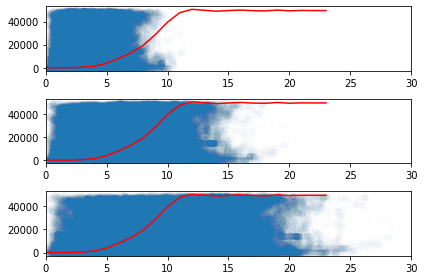

In [5]:
# Extra plots:
if 1:
    fig = plt.figure()
    ax = fig.add_subplot(3,1,1)
    ax.scatter(df3['Speed_50m'], df2['Park Power [KW]'], alpha=0.01)
    ax.plot(speeds, np.polyval(np.polyfit(speeds, powers*33, deg=16), speeds), color="r")
    ax.set_xlim([0, 30])
    ax = fig.add_subplot(3, 1, 2)
    ax.scatter(df3['Speed_100m'], df2['Park Power [KW]'], alpha=0.01)
    ax.plot(speeds, np.polyval(np.polyfit(speeds, powers * 33, deg=16), speeds), color="r")
    ax.set_xlim([0, 30])
    ax = fig.add_subplot(3, 1, 3)
    ax.scatter(df3['Speed_150m'], df2['Park Power [KW]'], alpha=0.01)
    ax.plot(speeds, np.polyval(np.polyfit(speeds, powers * 33, deg=16), speeds), color="r")
    ax.set_xlim([0, 30])
    fig.tight_layout()
    plt.show()

In [6]:
# Data functions: (Some helper functions to make everything easier)
if 1:
    def split_data(data_frame):
        " Takes dataframe and splits into train-, validation- and test set"

        df = data_frame

        # Observations:
        num_obs = df.shape[0]

        # Train-, validation-, and testing set:
        train_valid_split, valid_test_split = np.round(num_obs * np.array([0.7, 0.9]), -2).astype(int)

        train_data = df.iloc[:train_valid_split, :]
        valid_data = df.iloc[train_valid_split:valid_test_split, :]
        test_data = df.iloc[valid_test_split:, :]

        return train_data, valid_data, test_data


    def time_series_windows(data_set, seq_length=1, num_targets=1):
        h, w = data_set.shape

        # Pre-allocate attributes and targets:
        x = np.zeros((h - seq_length, seq_length, w - num_targets))
        y = np.zeros((h - seq_length, num_targets))

        for i in range(h - seq_length):
            x[i] = (data_set.iloc[i:i + seq_length, :-1])
            y[i] = (data_set.iloc[i + seq_length - 1, -1])

        return x, y
    
    def accuracy_rate(preds, targs):
        diff = preds - targs
        sq_diff = diff ** 2
        sum_sq_diff = np.sum(sq_diff)
        return (1 - (np.sqrt(sum_sq_diff) / (np.sqrt(len(preds))))) * 100
    

In [8]:
# Networks:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Simple Network:
class LSTM3(nn.Module):
    def __init__(self, num_classes, seq_length, input_size, hidden_size, num_layers):
        super(LSTM3, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True
                            #, dropout=0.5
                           )
        self.sigmoid = nn.Sigmoid()
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).cuda()

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).cuda()

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = self.dropout(h_out)

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)
        out = self.sigmoid(out)

        return out

# Complex Network:
if 1:
    from torch.nn.modules import dropout
    from operator import concat
    
    # Big Net
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import torch.nn.functional as F
    from torch.autograd import Variable # or perhaps costum one?
    import numpy as np # redundancy for quickload

    TCIA = torch.cuda.is_available()
    if TCIA:
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")
  
    class Net(nn.Module):

        def __init__(self, hidden_size, num_layers):
            super(Net, self).__init__()
            
            num_classes = 1
            input_size = 4 # of each group

            ## FOR LSTM
            self.num_classes = num_classes
            self.num_layers = num_layers
            self.input_size = input_size
            self.hidden_size = hidden_size

            self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                              num_layers=num_layers, batch_first=True
                                #, dropout=0.5
                               ) # dropout for more than 1 layer

            self.fc_wind = nn.Linear(hidden_size*num_layers, 10) # some out

            self.dropout = nn.Dropout(p=0.5) # Applied after denselayers
            self.relu = nn.ReLU()


            ## FOR CONV1D
            self.con_dir = nn.Conv1d(in_channels=5, out_channels=14, kernel_size=6, stride=4)# OUT(Batch,14,23) # takes: N is a batch size, C denotes a number of channels, L is a length of signal sequence.
            self.pool = nn.AvgPool1d(kernel_size=3,stride=3) # OUT(Batch,14,7) #after conv layers -> from 
            self.con_dir2 = nn.Conv1d(in_channels=14, out_channels=7, kernel_size=3, stride=1) # OUT(Batch,7,5) -> pool yields Batch,7,1

            self.con_TeDe = nn.Conv1d(in_channels=8, out_channels=20, kernel_size=6, stride=4)# OUT(Batch,20,23) # takes: N is a batch size, C denotes a number of channels, L is a length of signal sequence.
            self.con_TeDe2 = nn.Conv1d(in_channels=20, out_channels=7, kernel_size=3, stride=1) # OUT(Batch,7,5) -> pool yields Batch,7,1

            self.fc_dir = nn.Linear(in_features=7*1, out_features=5) # out here is pretty random
            self.fc_temp = nn.Linear(in_features=7*1, out_features=8) # out here is pretty random

            ## CONNECT ALL
            self.fc = nn.Linear(10 + 4*3 +1 + 12 , num_classes) # speed +4*sets+


        def forward(self, x): # TAKES ALL OF X, see index naming for understanding

            # FOR LSTM
            z = x[:,:,5:9] # 50-150m
            h_0 = Variable(torch.zeros(
             self.num_layers, z.size(0), self.hidden_size)).to(device)
            c_0 = Variable(torch.zeros(
              self.num_layers, z.size(0), self.hidden_size)).to(device)       

            # Propagate SPEEDS through LSTM
            ula, (h_out , _) = self.lstm(z, (h_0, c_0)) # ONLY WIND SPEEDS

            h_out=self.dropout(h_out)      
            h_out = h_out.view(-1, self.hidden_size*self.num_layers)
            x_wind = self.dropout(self.fc_wind(h_out))

            # FOR CONV1d # DIRECTION + PRESSURE
            z = x[:,:,0:5].permute(0,2,1)
            z = self.pool( self.relu( self.con_dir(z) ) ) # con-relu-pool-dense-drop
            z = self.pool( self.relu( self.con_dir2(z) ) )
            x_dir = self.dropout(self.fc_dir(z.view(-1,self.fc_dir.in_features)))

            # FOR CONV1d # TEMP and density
            z = x[:,:,9:17].permute(0,2,1) 
            z = self.pool( self.relu( self.con_TeDe(z) ) ) # con-relu-pool-dense-drop
            z = self.pool( self.relu( self.con_TeDe2(z) ) )
            x_temp = self.dropout(self.fc_temp(z.view(-1,self.fc_temp.in_features)))

            x_months = x[:,-1, 18:30 ] # of final seq

            x = torch.cat([x_wind , x_dir , x_temp , x_months] , 1) # adding months
            x = torch.sigmoid(x)

            out = self.fc(x)

            return out


 Generating data

 Generating Network

 Beginning Training Simple Net w/ 1 layer 30 hidden units
Epoch 20 : Train Loss 0.003391 , Train MSE Loss: 0.015212, Validation MSE Loss: 0.014753 
                            ETA: 	 0 days 	 0 hours 	 5 minutes
Epoch 40 : Train Loss 0.003264 , Train MSE Loss: 0.014681, Validation MSE Loss: 0.014074 
                            ETA: 	 0 days 	 0 hours 	 5 minutes
Epoch 60 : Train Loss 0.003156 , Train MSE Loss: 0.014324, Validation MSE Loss: 0.013886 
                            ETA: 	 0 days 	 0 hours 	 4 minutes
Epoch 80 : Train Loss 0.003086 , Train MSE Loss: 0.014127, Validation MSE Loss: 0.013897 
                            ETA: 	 0 days 	 0 hours 	 3 minutes
Epoch 100 : Train Loss 0.003042 , Train MSE Loss: 0.013948, Validation MSE Loss: 0.013880 
                            ETA: 	 0 days 	 0 hours 	 3 minutes
Epoch 120 : Train Loss 0.003010 , Train MSE Loss: 0.014060, Validation MSE Loss: 0.013861 
                            ETA: 	 0 day

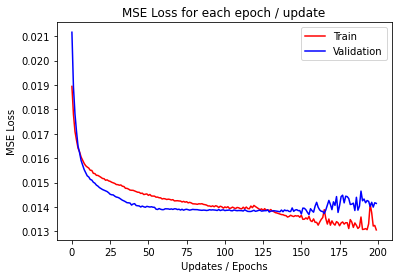

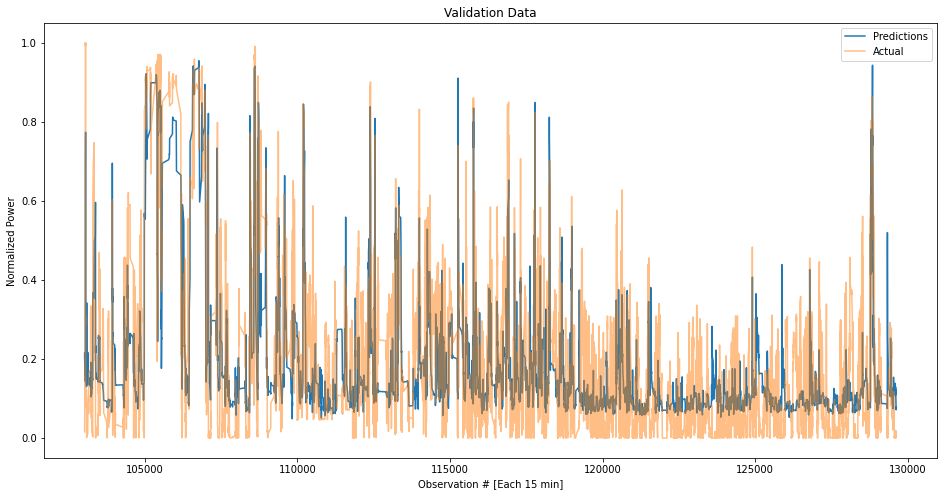

Validation Accuracy:	88.11 %


In [9]:
# Training Simple Network:
if 1:
    
    # Split data
    train_data, valid_data, test_data = split_data(df_simple)
    
    # Network parameters:
    [batch_size, seq_len, num_feats, num_targs] = 508, 96, 4, 1

    # Get attributes and targets:
    print("\n Generating data")
    x_train, y_train = time_series_windows(train_data, seq_len, num_targs)
    x_valid, y_valid = time_series_windows(valid_data, seq_len, num_targs)
    x_test, y_test = time_series_windows(test_data, seq_len, num_targs)

    # Imports
    print("\n Generating Network")
    import torch, torch.nn as nn, torch.optim as optim

    # Check for GPU availability:
    TCIA = torch.cuda.is_available()
    device = torch.device(TCIA * "cuda" + ~TCIA * "cpu")

    # GPU Transfer
    x_train, y_train = torch.Tensor(x_train).to(device), \
                       torch.Tensor(y_train).to(device)
    x_valid, y_valid = torch.Tensor(x_valid).to(device), \
                       torch.Tensor(y_valid).to(device)

    x_test, y_test = torch.Tensor(x_test).to(device), \
                     torch.Tensor(y_test).to(device)

    # Define slice function:
    get_slice = lambda i, size: range(i * size, (i + 1) * size)

    # Hyper parameters and epoch size:
    [num_epochs, num_layer, num_hid_units, num_classes] = 200, 1, 1, 1

    for layer in range(num_layer):
        layer += 1
        for hid_units in range(num_hid_units):
            hid_units += 30

            # Load and transfer network
            net = LSTM3(num_classes, seq_len, num_feats, hid_units, layer).to(device)
            
            # Optimizer and criterion:
            optimizer, criterion = optim.Adam(net.parameters()), nn.MSELoss()

            # Number of batches:
            num_samples_train = x_train.shape[0]
            num_batches_train = num_samples_train // batch_size
            num_samples_valid = x_valid.shape[0]
            num_batches_valid = num_samples_valid // batch_size

            # setting up lists for handling loss/accuracy:
            train_acc, train_loss = [], []
            valid_acc, valid_loss = [], []
            test_acc, test_loss = [], []
            cur_loss = 0
            losses = []

            # Training:
            print("\n Beginning Training Simple Net w/ {} layer {} hidden units".format(layer, hid_units))

            # Number of training cycles:
            for epoch in range(num_epochs):

                epoch_start = datetime.datetime.now()

                # Set network to training-mode:
                net.train()

                cur_loss = 0

                # Train on each batch:
                for i in range(num_batches_train):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output, batch_target = net(x_train[slce]).reshape((-1, 1)), y_train[slce]

                    # Zero the gradients:
                    optimizer.zero_grad()

                    # Compute gradients from loss:
                    batch_loss = criterion(batch_output, batch_target)
                    batch_loss.backward()
                    optimizer.step()

                    # Add loss to current epoch loss:
                    cur_loss += batch_loss

                # Append normalized loss:
                losses.append(cur_loss / batch_size)

                # Set network to evaluation-mode:
                net.eval()

                # Performance lists:
                train_preds, train_targs = [], []

                # Evaluate on each training batch:
                for i in range(num_batches_train):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output = net(x_train[slce]).reshape((-1, 1)).to("cpu")
                    batch_target = y_train[slce].to("cpu")

                    # Append targets and predictions
                    train_targs += list(batch_target.numpy())
                    train_preds += list(batch_output.detach().numpy())

                # Performance lists:
                valid_preds, valid_targs = [], []

                # Evaluate on each validation batch:
                for i in range(num_batches_valid):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output = net(x_valid[slce]).reshape((-1, 1)).to("cpu")
                    batch_target = y_valid[slce].to("cpu")

                    # Append targets and predictions
                    valid_targs += list(batch_target.numpy())
                    valid_preds += list(batch_output.detach().numpy())

                # Epoch accuracy:
                train_acc_epoch = ((np.array(train_targs) - np.array(train_preds)) ** 2).sum() / len(
                    train_targs)
                valid_acc_epoch = ((np.array(valid_targs) - np.array(valid_preds)) ** 2).sum() / len(
                    valid_targs)

                # Accuracy list:
                train_acc.append(train_acc_epoch)
                valid_acc.append(valid_acc_epoch)

                # Time tracker
                epoch_finish = datetime.datetime.now()
                epoch_time = epoch_finish - epoch_start
                if epoch == 0:
                    avg_epoch_time = epoch_time
                else:
                    avg_epoch_time = epoch_time / (epoch + 1) + avg_epoch_time / (epoch + 1) * epoch
                ETA = avg_epoch_time * (num_epochs - epoch)
                days, hours, minutes = ETA.days, ETA.seconds // 3600, ETA.seconds // 60 % 60

                # Print and plot:
                if (epoch+1) % 20 == 0:
                    print("Epoch %2i : Train Loss %f , Train MSE Loss: %f, Validation MSE Loss: %f \n \
                           ETA: \t %d days \t %d hours \t %d minutes" % (
                        epoch + 1, losses[-1], train_acc_epoch, valid_acc_epoch, days, hours, minutes))
                
                # Stuff for saving:
                if 0:
                    if epoch == 0:
                        states = {
                            'epoch': epoch,
                            'state_dict': net.state_dict(),
                            'optimizer': optimizer.state_dict(),
                        }
                        torch.save(states, "Models/LSTM_96_{}_lstm_layers_{}_hidden_units.pt".format(layer,
                                                                                                     hid_units,
                                                                                                     epoch))
                        states = {}
                        valid_acc_min = np.min(np.asarray(valid_acc))
                    else:
                        if valid_acc_min > np.min(np.asarray(valid_acc)):
                            valid_acc_min = np.min(np.asarray(valid_acc))
                            states = {
                                'epoch': epoch,
                                'state_dict': net.state_dict(),
                                'optimizer': optimizer.state_dict(),
                            }
                            torch.save(states,
                                       "Models/LSTM_96_{}_lstm_layers_{}_hidden_units.pt".format(layer,
                                                                                                 hid_units,
                                                                                                 epoch))
                            states = {}

                    accuracies = {
                        'train': train_acc,
                        'valid': valid_acc
                    }
                else:
                    simple_network = {"epoch": epoch,
                                      "state_dict": net.state_dict(),
                                      "optimizer": optimizer.state_dict()}
                    simple_accuracies = {
                        'train': train_acc,
                        'valid': valid_acc
                    }

# Plots
plt.figure()
epochs = np.arange(num_epochs)
plt.plot(epochs, np.asarray(simple_accuracies['train']), 'r', 
         epochs, np.asarray(simple_accuracies['valid']), 'b')

plt.legend(['Train', 'Validation', 'Optimal'])
plt.xlabel('Updates / Epochs'), plt.ylabel('MSE Loss')
plt.title("MSE Loss for each epoch / update")

plt.show()

valid_preds_array = np.asarray(valid_preds)
valid_targs_array = np.asarray(valid_targs)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.title.set_text("Validation Data")
valid_xs = valid_data[-len(valid_preds):].index.values
ax.plot(valid_xs, valid_preds_array, alpha=1)
ax.plot(valid_xs, valid_targs_array, alpha=0.5)
ax.set_ylabel("Normalized Power")
ax.set_xlabel("Observation # [Each 15 min]")
ax.legend(['Predictions', "Actual"])
plt.show()

print("Validation Accuracy:\t{:2.2f} %".format(accuracy_rate(valid_targs_array, valid_preds_array)))



 Generating data

 Generating Network

 Beginning Training Complex Net w/ 1 layer 30 hidden units
Epoch 20 : Train Loss 0.005717 , Train MSE Loss: 0.028473, Validation MSE Loss: 0.036525 
                            ETA: 	 0 days 	 0 hours 	 6 minutes
Epoch 40 : Train Loss 0.005486 , Train MSE Loss: 0.027454, Validation MSE Loss: 0.035686 
                            ETA: 	 0 days 	 0 hours 	 6 minutes
Epoch 60 : Train Loss 0.005357 , Train MSE Loss: 0.026836, Validation MSE Loss: 0.035146 
                            ETA: 	 0 days 	 0 hours 	 5 minutes
Epoch 80 : Train Loss 0.005267 , Train MSE Loss: 0.026388, Validation MSE Loss: 0.034713 
                            ETA: 	 0 days 	 0 hours 	 4 minutes
Epoch 100 : Train Loss 0.005189 , Train MSE Loss: 0.026000, Validation MSE Loss: 0.034273 
                            ETA: 	 0 days 	 0 hours 	 3 minutes
Epoch 120 : Train Loss 0.005136 , Train MSE Loss: 0.025665, Validation MSE Loss: 0.033875 
                            ETA: 	 0 da

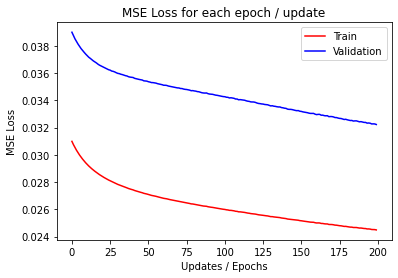

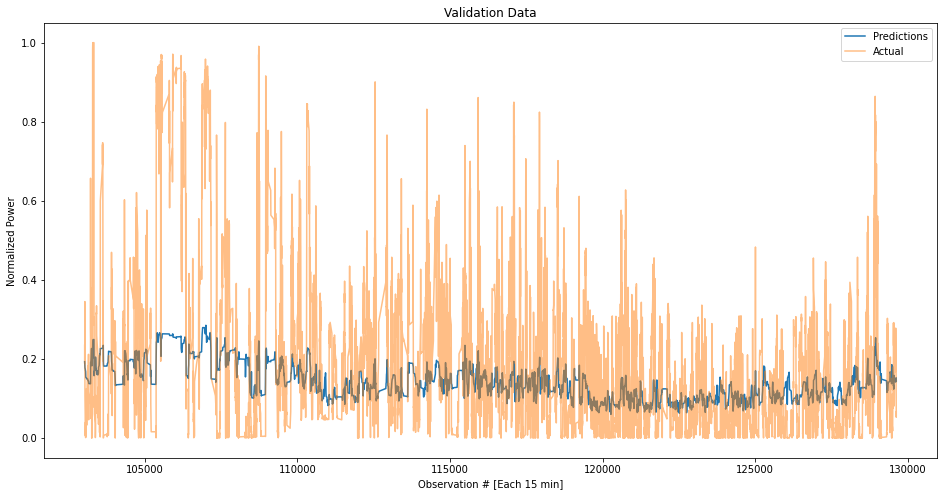

Validation Accuracy:	82.05 %


In [16]:
# Training Complex Network:
if 1:
    
    # Split data
    train_data, valid_data, test_data = split_data(df_complex)
    
    # Network parameters:
    [batch_size, seq_len, num_feats, num_targs] = 508, 96, 30, 1

    # Get attributes and targets:
    print("\n Generating data")
    x_train, y_train = time_series_windows(train_data, seq_len, num_targs)
    x_valid, y_valid = time_series_windows(valid_data, seq_len, num_targs)
    x_test, y_test = time_series_windows(test_data, seq_len, num_targs)

    # Imports
    print("\n Generating Network")
    import torch, torch.nn as nn, torch.optim as optim

    # Check for GPU availability:
    TCIA = torch.cuda.is_available()
    device = torch.device(TCIA * "cuda" + ~TCIA * "cpu")

    # GPU Transfer
    x_train, y_train = torch.Tensor(x_train).to(device), \
                       torch.Tensor(y_train).to(device)
    x_valid, y_valid = torch.Tensor(x_valid).to(device), \
                       torch.Tensor(y_valid).to(device)

    x_test, y_test = torch.Tensor(x_test).to(device), \
                     torch.Tensor(y_test).to(device)

    # Define slice function:
    get_slice = lambda i, size: range(i * size, (i + 1) * size)

    # Hyper parameters and epoch size:
    [num_epochs, num_layer, num_hid_units, num_classes] = 200, 1, 1, 1

    for layer in range(num_layer):
        layer += 1
        for hid_units in range(num_hid_units):
            hid_units += 30

            # Load and transfer network
            net = Net(num_feats, layer).to(device)
            
            # Optimizer and criterion:
            optimizer, criterion = optim.SGD(net.parameters(), lr=0.01 ,weight_decay=0.01), nn.MSELoss()
            
            # Number of batches:
            num_samples_train = x_train.shape[0]
            num_batches_train = num_samples_train // batch_size
            num_samples_valid = x_valid.shape[0]
            num_batches_valid = num_samples_valid // batch_size

            # setting up lists for handling loss/accuracy:
            train_acc, train_loss = [], []
            valid_acc, valid_loss = [], []
            test_acc, test_loss = [], []
            cur_loss = 0
            losses = []

            # Training:
            print("\n Beginning Training Complex Net w/ {} layer {} hidden units".format(layer, hid_units))

            # Number of training cycles:
            for epoch in range(num_epochs):

                epoch_start = datetime.datetime.now()

                # Set network to training-mode:
                net.train()

                cur_loss = 0

                # Train on each batch:
                for i in range(num_batches_train):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output, batch_target = net(x_train[slce]).reshape((-1, 1)), y_train[slce]

                    # Zero the gradients:
                    optimizer.zero_grad()

                    # Compute gradients from loss:
                    batch_loss = criterion(batch_output, batch_target)
                    batch_loss.backward()
                    optimizer.step()

                    # Add loss to current epoch loss:
                    cur_loss += batch_loss

                # Append normalized loss:
                losses.append(cur_loss / batch_size)

                # Set network to evaluation-mode:
                net.eval()

                # Performance lists:
                train_preds, train_targs = [], []

                # Evaluate on each training batch:
                for i in range(num_batches_train):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output = net(x_train[slce]).reshape((-1, 1)).to("cpu")
                    batch_target = y_train[slce].to("cpu")

                    # Append targets and predictions
                    train_targs += list(batch_target.numpy())
                    train_preds += list(batch_output.detach().numpy())

                # Performance lists:
                valid_preds, valid_targs = [], []

                # Evaluate on each validation batch:
                for i in range(num_batches_valid):
                    # Get output and target:
                    slce = get_slice(i, batch_size)
                    batch_output = net(x_valid[slce]).reshape((-1, 1)).to("cpu")
                    batch_target = y_valid[slce].to("cpu")

                    # Append targets and predictions
                    valid_targs += list(batch_target.numpy())
                    valid_preds += list(batch_output.detach().numpy())

                # Epoch accuracy:
                train_acc_epoch = ((np.array(train_targs) - np.array(train_preds)) ** 2).sum() / len(
                    train_targs)
                valid_acc_epoch = ((np.array(valid_targs) - np.array(valid_preds)) ** 2).sum() / len(
                    valid_targs)

                # Accuracy list:
                train_acc.append(train_acc_epoch)
                valid_acc.append(valid_acc_epoch)

                # Time tracker
                epoch_finish = datetime.datetime.now()
                epoch_time = epoch_finish - epoch_start
                if epoch == 0:
                    avg_epoch_time = epoch_time
                else:
                    avg_epoch_time = epoch_time / (epoch + 1) + avg_epoch_time / (epoch + 1) * epoch
                ETA = avg_epoch_time * (num_epochs - epoch)
                days, hours, minutes = ETA.days, ETA.seconds // 3600, ETA.seconds // 60 % 60

                # Print and plot:
                if (epoch+1) % 20 == 0:
                    print("Epoch %2i : Train Loss %f , Train MSE Loss: %f, Validation MSE Loss: %f \n \
                           ETA: \t %d days \t %d hours \t %d minutes" % (
                        epoch + 1, losses[-1], train_acc_epoch, valid_acc_epoch, days, hours, minutes))
                
                # Stuff for saving:
                if 0:
                    if epoch == 0:
                        states = {
                            'epoch': epoch,
                            'state_dict': net.state_dict(),
                            'optimizer': optimizer.state_dict(),
                        }
                        torch.save(states, "Models/LSTM_96_{}_lstm_layers_{}_hidden_units.pt".format(layer,
                                                                                                     hid_units,
                                                                                                     epoch))
                        states = {}
                        valid_acc_min = np.min(np.asarray(valid_acc))
                    else:
                        if valid_acc_min > np.min(np.asarray(valid_acc)):
                            valid_acc_min = np.min(np.asarray(valid_acc))
                            states = {
                                'epoch': epoch,
                                'state_dict': net.state_dict(),
                                'optimizer': optimizer.state_dict(),
                            }
                            torch.save(states,
                                       "Models/LSTM_96_{}_lstm_layers_{}_hidden_units.pt".format(layer,
                                                                                                 hid_units,
                                                                                                 epoch))
                            states = {}

                    accuracies = {
                        'train': train_acc,
                        'valid': valid_acc
                    }
                else:
                    complex_network = {"epoch": epoch,
                                      "state_dict": net.state_dict(),
                                      "optimizer": optimizer.state_dict()}
                    complex_accuracies = {
                        'train': train_acc,
                        'valid': valid_acc
                    }

# Plots
plt.figure()
epochs = np.arange(num_epochs)
plt.plot(epochs, np.asarray(complex_accuracies['train']), 'r', 
         epochs, np.asarray(complex_accuracies['valid']), 'b')

plt.legend(['Train', 'Validation', 'Optimal'])
plt.xlabel('Updates / Epochs'), plt.ylabel('MSE Loss')
plt.title("MSE Loss for each epoch / update")

plt.show()

valid_preds_array = np.asarray(valid_preds)
valid_targs_array = np.asarray(valid_targs)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.title.set_text("Validation Data")
valid_xs = valid_data[-len(valid_preds):].index.values
ax.plot(valid_xs, valid_preds_array, alpha=1)
ax.plot(valid_xs, valid_targs_array, alpha=0.5)
ax.set_ylabel("Normalized Power")
ax.set_xlabel("Observation # [Each 15 min]")
ax.legend(['Predictions', "Actual"])
plt.show()

print("Validation Accuracy:\t{:2.2f} %".format(accuracy_rate(valid_targs_array, valid_preds_array)))
